**Importing requied libraies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AI_ML_YT_Videos.csv')
df.head()

,Unnamed: 0,Channel,Title,PublishedDate,Views,Likes,Comments
0,0,Jeff Heaton,LSTM-Based Time Series with PyTorch (10.2),2023-10-27,764,45,1
1,1,Jeff Heaton,"Time Series Data Encoding for Deep Learning, P...",2023-10-26,530,31,1
2,2,Jeff Heaton,Bayesian Hyperparameter Optimization for PyTor...,2023-10-25,453,29,1
3,3,Jeff Heaton,Creating Certificates to Deploy PyInstaller Py...,2023-10-17,439,12,0
4,4,Jeff Heaton,How Should you Architect Your PyTorch Neural N...,2023-10-12,825,39,1


In [3]:
df.shape

(6151, 7)

In [4]:
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
df.head(1)

,Channel,Title,PublishedDate,Views,Likes,Comments
0,Jeff Heaton,LSTM-Based Time Series with PyTorch (10.2),2023-10-27,764,45,1


In [6]:
# checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6151 entries, 0 to 6150
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Channel        6151 non-null   object
 1   Title          6151 non-null   object
 2   PublishedDate  6151 non-null   object
 3   Views          6151 non-null   int64 
 4   Likes          6151 non-null   int64 
 5   Comments       6151 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 288.5+ KB


In [7]:
df.describe()

,Views,Likes,Comments
count,6.151000e+03,6151.000000,6151.000000
mean,5.220895e+04,935.637132,72.171029
std,1.180318e+05,2243.596155,144.250349
min,0.000000e+00,0.000000,0.000000
25%,5.017500e+03,83.000000,7.000000
50%,1.660600e+04,313.000000,27.000000
75%,5.211650e+04,926.000000,80.000000
max,2.689040e+06,64750.000000,3478.000000


In [8]:
# Exploring Data Analysis
# # Let's find the most demanding youtube channel
most_demand_channel = []
print(most_demand_channel)

[]


In [9]:
most_demand_channel = pd.DataFrame()
print(most_demand_channel)

Empty DataFrame
Columns: []
Index: []


In [10]:
most_demand_channel = df['Channel'].str.split(',',expand=True)
most_demand_channel

,0
0,Jeff Heaton
1,Jeff Heaton
2,Jeff Heaton
3,Jeff Heaton
4,Jeff Heaton
...,...
6146,Krish Naik
6147,Krish Naik
6148,Krish Naik
6149,Krish Naik


In [11]:
most_demand_channel.columns = ['Channel_name']

In [12]:
demand_channel = most_demand_channel.groupby(['Channel_name']).size().reset_index(name = 'Total count')
demand_channel

,Channel_name,Total count
0,Applied AI Course,519
1,Artificial Intelligence — All in One,413
2,Arxiv Insights,13
3,Daniel Bourke,300
4,DeepLearning.TV,32
5,DeepLearningAI,392
6,Jeff Heaton,607
7,Jeremy Howard,185
8,Krish Naik,1669
9,Nicholas Renotte,304


In [13]:
df['Channel'].value_counts()

Krish Naik                              1669
Sentdex                                 1248
Jeff Heaton                              607
Applied AI Course                        519
Siraj Raval                              469
Artificial Intelligence — All in One     413
DeepLearningAI                           392
Nicholas Renotte                         304
Daniel Bourke                            300
Jeremy Howard                            185
DeepLearning.TV                           32
Arxiv Insights                            13
Name: Channel, dtype: int64

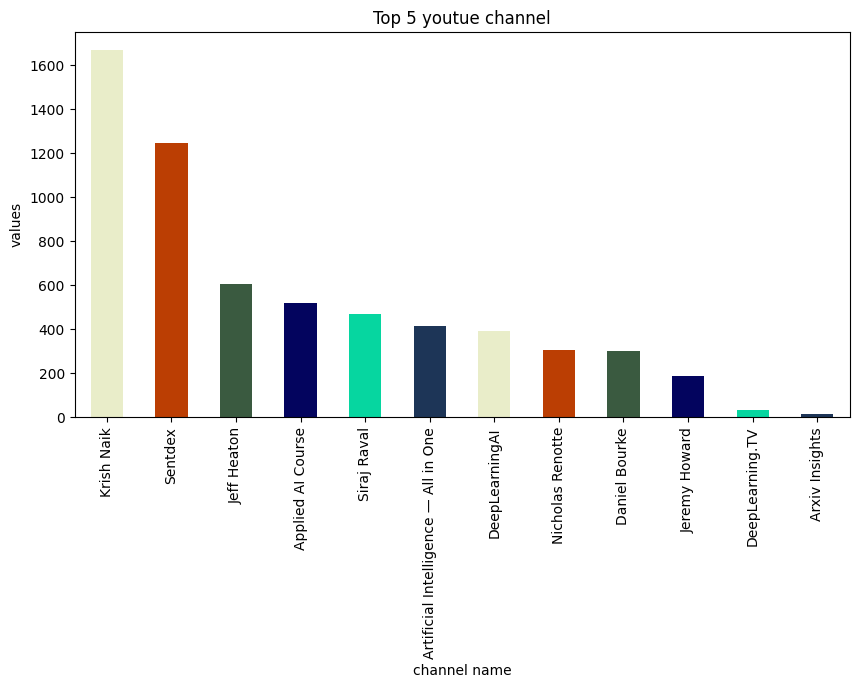

In [14]:
df['Channel'].value_counts().plot(kind='bar',figsize=(10,5),color=['#e9edc9','#bb3e03','#3a5a40','#03045e','#06d6a0','#1d3557'])
plt.title('Top 5 youtue channel')
plt.xlabel('channel name')
plt.ylabel('values')
plt.show()

In [15]:
# calculate the total views
top_views = df.groupby('Channel')['Views'].sum().sort_values(ascending=False)
top_views

Channel
Sentdex                                 112159185
Krish Naik                               83635593
Siraj Raval                              49804096
DeepLearningAI                           15875334
Nicholas Renotte                         13255443
Applied AI Course                        13194574
Jeremy Howard                             7894444
Daniel Bourke                             7857301
Jeff Heaton                               6600032
DeepLearning.TV                           4375619
Artificial Intelligence — All in One      4301690
Arxiv Insights                            2183959
Name: Views, dtype: int64

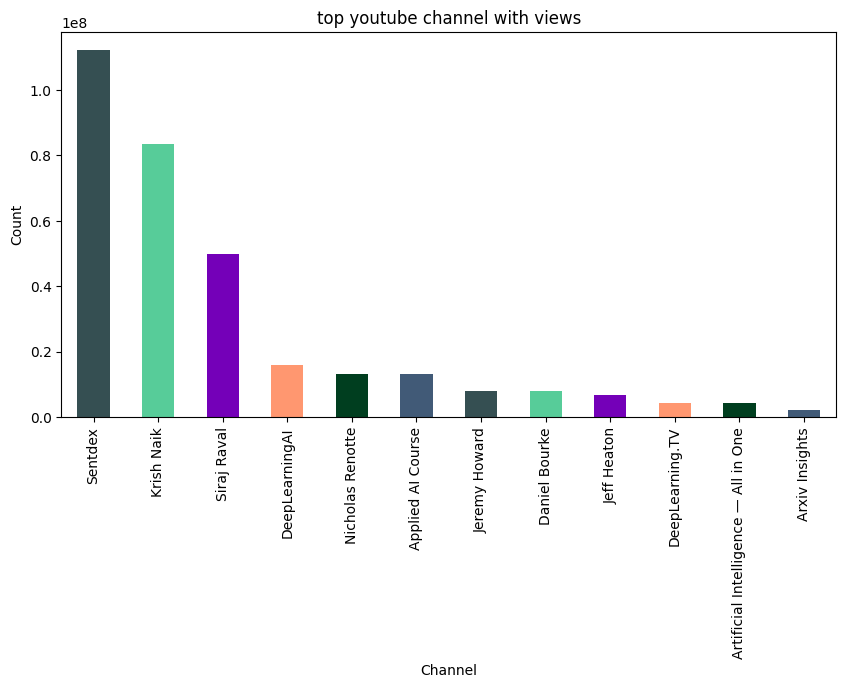

In [16]:
top_views.plot(kind='bar',figsize=(10,5)\
               ,color = ['#354f52','#57cc99','#7400b8','#ff9770','#003e1f','#415a77'])
plt.title('top youtube channel with views')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

In [17]:

top_views

Channel
Sentdex                                 112159185
Krish Naik                               83635593
Siraj Raval                              49804096
DeepLearningAI                           15875334
Nicholas Renotte                         13255443
Applied AI Course                        13194574
Jeremy Howard                             7894444
Daniel Bourke                             7857301
Jeff Heaton                               6600032
DeepLearning.TV                           4375619
Artificial Intelligence — All in One      4301690
Arxiv Insights                            2183959
Name: Views, dtype: int64

In [18]:
# top 10 highest views in the title
top_10_most_views = df.groupby('Title')['Views'].sum().sort_values(ascending=False)
top_10_most_views
top_10_most_views.info()

<class 'pandas.core.series.Series'>
Index: 6113 entries, AI VS ML VS DL VS Data Science to Jeremy Howard Live Stream
Series name: Views
Non-Null Count  Dtype
--------------  -----
6113 non-null   int64
dtypes: int64(1)
memory usage: 95.5+ KB


In [19]:
top_10_most_views = pd.DataFrame(df.groupby('Title')['Views'].sum().sort_values(ascending=False)).head(10)
top_10_most_views

,Views
Title,
AI VS ML VS DL VS Data Science,2689040
Practical Machine Learning Tutorial with Python Intro p.1,2665790
Complete Road Map To Be Expert In Python- Follow My Way,1640772
How To Learn Data Science Smartly?,1617866
Prakhar Raj Become Data Scientist at Simpl | Data Scientist Interview | Applied Ai Course Reviews,1605793
Self driving car neural network in the city - Python plays GTA with Tensor Flow p.14,1573086
I Built a Trading Bot with ChatGPT,1538575
Regression Intro - Practical Machine Learning Tutorial with Python p.2,1391530
YOLO Object Detection (TensorFlow tutorial),1340082


In [20]:
# Which channel recived highest comments
top_channel_comment = df.groupby('Channel')['Comments'].sum().sort_values(ascending=False)
top_channel_comment

Channel
Sentdex                                 135244
Krish Naik                              115668
Siraj Raval                             101965
Nicholas Renotte                         36492
Daniel Bourke                            16909
Jeff Heaton                              12221
Applied AI Course                         9036
DeepLearningAI                            5993
Jeremy Howard                             4562
Arxiv Insights                            2348
DeepLearning.TV                           2134
Artificial Intelligence — All in One      1352
Name: Comments, dtype: int64

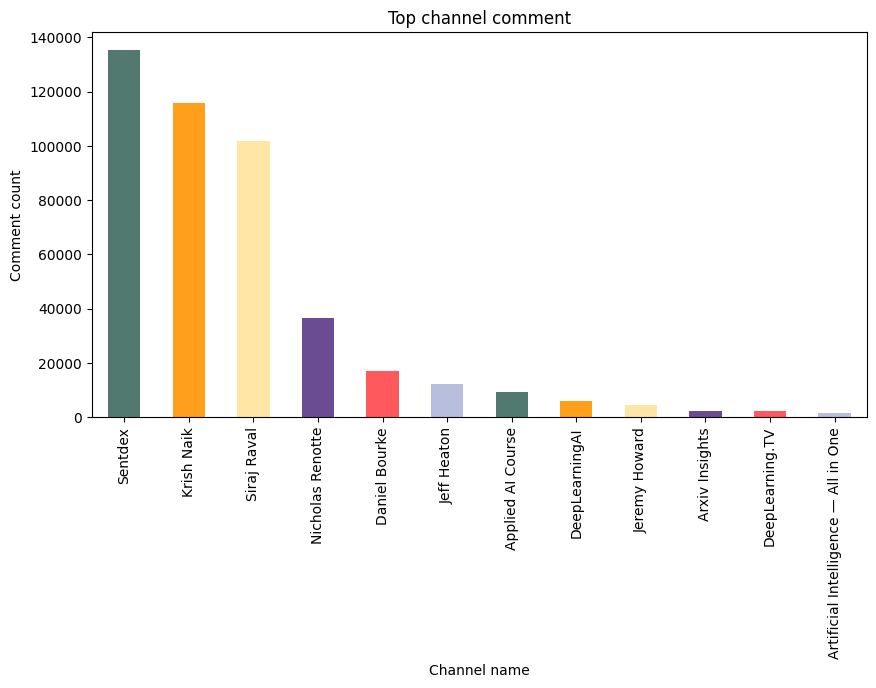

In [21]:
top_channel_comment.plot(kind='bar',figsize=(10,5),color=['#52796f','#ff9f1c','#ffe6a7','#6a4c93','#ff595e','#b8bedd'])
plt.title('Top channel comment')
plt.xlabel('Channel name')
plt.ylabel('Comment count')
plt.show()

In [22]:
# Which video have highest comments
top_10_video_comment = pd.DataFrame(df.groupby('Title')['Comments'].sum().sort_values(ascending=False)).head(10)
top_10_video_comment

,Comments
Title,
Tensorflow Object Detection in 5 Hours with Python | Full Course with 3 Projects,3478
Real Time Sign Language Detection with Tensorflow Object Detection and Python | Deep Learning SSD,2603
My Apology,2031
Real Time Face Mask Detection with Tensorflow and Python | Custom Object Detection w/ MobileNet SSD,1808
AI VS ML VS DL VS Data Science,1697
Neural Networks from Scratch - P.1 Intro and Neuron Code,1610
Self driving car neural network in the city - Python plays GTA with Tensor Flow p.14,1518
"Deep Learning with Python, TensorFlow, and Keras tutorial",1480
Regression Intro - Practical Machine Learning Tutorial with Python p.2,1461


In [23]:
# Let's find top 10 most viewed videos for Sentdex
sentdex = df['Channel']=='Sentdex'
top_10_sentdex = pd.DataFrame(df.loc[sentdex].groupby('Title')['Views'].sum().sort_values(ascending=False).head(10))
top_10_sentdex

,Views
Title,
Practical Machine Learning Tutorial with Python Intro p.1,2665790
Self driving car neural network in the city - Python plays GTA with Tensor Flow p.14,1573086
Regression Intro - Practical Machine Learning Tutorial with Python p.2,1391530
"Deep Learning with Python, TensorFlow, and Keras tutorial",1239057
Neural Networks from Scratch - P.1 Intro and Neuron Code,1221616
How to download and install Python Packages and Modules with Pip,1096700
Introduction - Django Web Development with Python 1,1084268
Game Development in Python 3 With PyGame - 1 - Intro,947122
"Loading in your own data - Deep Learning basics with Python, TensorFlow and Keras p.2",847508


In [24]:
Krish_Naik = df['Channel']=='Krish Naik'
top_10_Krish_Naik = pd.DataFrame(df.loc[Krish_Naik].groupby('Title')['Views'].sum().sort_values(ascending=False).head(10))
top_10_Krish_Naik

,Views
Title,
AI VS ML VS DL VS Data Science,2689040
Complete Road Map To Be Expert In Python- Follow My Way,1640772
How To Learn Data Science Smartly?,1617866
OTT Platform For Education OneNeuron- Education As A Service,736171
Negotiating Salaries With HR for Any Job Is An Art. Learn IT Before It's Late 😭😭😭😭,701980
Complete Road Map To Prepare NLP-Follow This Video-You Will Able to Crack Any DS Interviews🔥🔥,626078
Live- Implementation of End To End Kaggle Machine Learning Project With Deployment,586459
How To Learn Data Science by Self Study and For Free,538796
Live Day 1- Introduction To statistics In Data Science,491223


In [25]:
df.head()

,Channel,Title,PublishedDate,Views,Likes,Comments
0,Jeff Heaton,LSTM-Based Time Series with PyTorch (10.2),2023-10-27,764,45,1
1,Jeff Heaton,"Time Series Data Encoding for Deep Learning, P...",2023-10-26,530,31,1
2,Jeff Heaton,Bayesian Hyperparameter Optimization for PyTor...,2023-10-25,453,29,1
3,Jeff Heaton,Creating Certificates to Deploy PyInstaller Py...,2023-10-17,439,12,0
4,Jeff Heaton,How Should you Architect Your PyTorch Neural N...,2023-10-12,825,39,1


In [28]:
top10_video_comments = pd.DataFrame(df.groupby('Title')['Comments'].sum().sort_values(ascending=False).head(10))
top10_video_comments

,Comments
Title,
Tensorflow Object Detection in 5 Hours with Python | Full Course with 3 Projects,3478
Real Time Sign Language Detection with Tensorflow Object Detection and Python | Deep Learning SSD,2603
My Apology,2031
Real Time Face Mask Detection with Tensorflow and Python | Custom Object Detection w/ MobileNet SSD,1808
AI VS ML VS DL VS Data Science,1697
Neural Networks from Scratch - P.1 Intro and Neuron Code,1610
Self driving car neural network in the city - Python plays GTA with Tensor Flow p.14,1518
"Deep Learning with Python, TensorFlow, and Keras tutorial",1480
Regression Intro - Practical Machine Learning Tutorial with Python p.2,1461


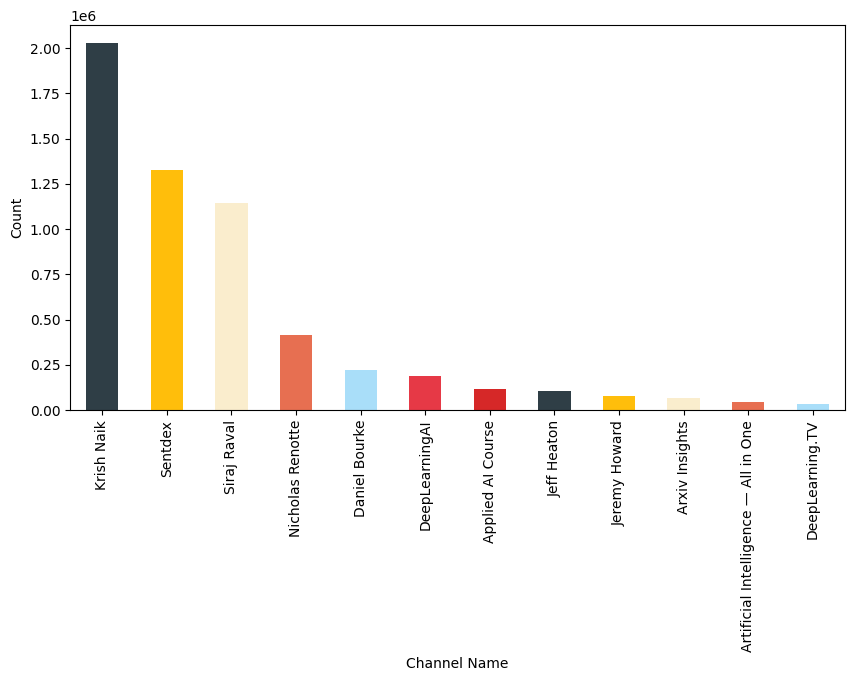

In [31]:
# find the top youtube channel with high likes
df.groupby('Channel')['Likes'].sum().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,5),color=['#2f3e46','#ffbe0b','#faedcd','#e76f51','#a9def9','#e63946','#d62828'])
plt.xlabel('Channel Name')
plt.ylabel('Count')
plt.show()

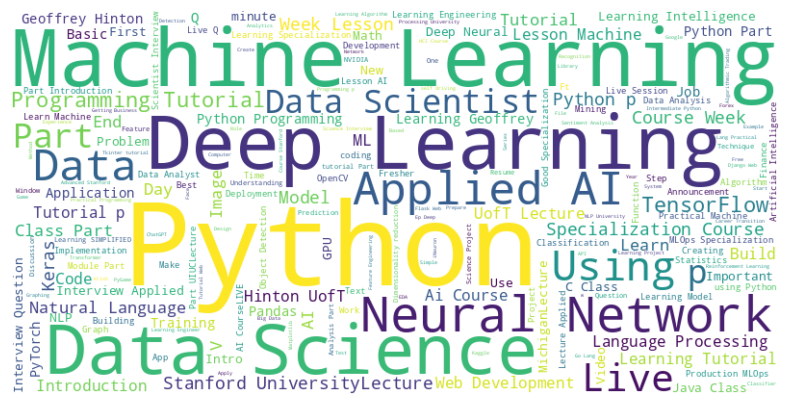

In [32]:
# Some most used title  visualization with using the wordcloud generator
from wordcloud import WordCloud
text = ''.join(i for i in df['Title'])
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()